In [522]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import seaborn as sns
pd.set_option('display.max_columns',None)

**The dataset is extremely large, so we have decided to take a representative sample from it. However, we have also noticed that the dataset is imbalanced, meaning that some classes or categories are underrepresented. To address this issue, we will perform oversampling all at once. This is necessary to ensure that our model receives sufficient data for training and can learn effectively.**

In [523]:
#df1 = data.loc[df['Severity'] == 1].sample(25000)
#df2 = data.loc[df['Severity'] == 2].sample(25000)
#df = data.loc[df['Severity'] == 3].sample(25000)
#df4 = data.loc[df['Severity'] == 4].sample(25000)

#dataframes = [df1,df2,df,df4]
#df =pd.concat(dataframes)
#df.to_csv('../Dataset/OverSampling.csv')

In [524]:
df = pd.read_csv('../Dataset/OverSampling.csv')

In [525]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2169655,1,2020-06-12 12:56:58,2020-06-12 13:41:58,32.17783,-110.96829,32.17783,-110.96829,0.0,At S 12th Ave - Accident.,3798.0,S 6th Ave,R,Tucson,Pima,AZ,85713-6114,US,US/Mountain,KTUS,2020-06-12 12:58:00,100.0,100.0,12.0,27.23,10.0,WSW,9.0,0.0,Fair,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-2257101,1,2020-04-14 16:34:14,2020-04-14 17:19:14,33.63992,-112.11400,33.63992,-112.11400,0.0,At I-17/N Black Canyon Hwy - Accident.,NaN,N Black Canyon Hwy,R,Phoenix,Maricopa,AZ,85053,US,US/Mountain,KDVT,2020-04-14 16:53:00,76.0,76.0,15.0,28.36,10.0,WSW,10.0,0.0,Fair,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2,A-2124482,1,2020-05-18 07:40:53,2020-05-18 08:25:53,31.76764,-106.47350,31.76764,-106.47350,0.0,At N Mesa St - Accident.,198.0,N Cotton St,R,El Paso,El Paso,TX,79901-1757,US,US/Mountain,KELP,2020-05-18 07:40:00,73.0,73.0,20.0,26.10,10.0,CALM,0.0,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-2252128,1,2020-04-11 13:44:49,2020-04-11 14:49:47,31.71112,-106.36806,31.71112,-106.36806,0.0,At TX-375-LOOP/Border Hwy - Accident.,NaN,S Yarbrough Dr,R,El Paso,El Paso,TX,79915,US,US/Mountain,KELP,2020-04-11 13:40:00,72.0,72.0,11.0,25.94,10.0,SW,17.0,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2106659,1,2020-05-08 14:19:50,2020-05-08 15:24:48,33.48051,-112.01290,33.48051,-112.01290,0.0,At N 32nd St - Accident.,3200.0,E Thomas Rd,L,Phoenix,Maricopa,AZ,85018-7301,US,US/Mountain,KPHX,2020-05-08 13:51:00,98.0,98.0,10.0,28.66,10.0,W,9.0,0.0,Mostly Cloudy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


**We create a Duration of accidents column**

In [526]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Duration'] = round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df['Distance(mi)'].describe()

count    100000.000000
mean          0.745421
std           2.178507
min           0.000000
25%           0.000000
50%           0.181000
75%           0.700000
max         155.186000
Name: Distance(mi), dtype: float64

In [527]:
# We keep that columns

df = df[['Severity', 'Start_Lat',
       'Start_Lng','Distance(mi)','City','Temperature(F)','Pressure(in)','Wind_Chill(F)','Humidity(%)','Visibility(mi)',
       'Wind_Speed(mph)','Precipitation(in)','Weather_Condition' , 'Crossing' , 'Junction' , 'No_Exit' , 'Traffic_Signal','Duration']]

In [528]:
df = df.rename(columns = {'Distance(mi)': 'Distance_mi','Temperature(F)' : 'Temperature_F', 'Wind_Chill(F)': 'Wind_Chill_F' ,
                           'Humidity(%)' : 'Humidity_percentage' , 'Pressure(in)': 'Pressure_in','Visibility(mi)': 'Visibility_mi', 
                           'Wind_Speed(mph)': 'Wind_Speed_mph', 'Precipitation(in)': 'Precipitation_in' })

df.shape

(100000, 18)

In [529]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance_mi', 'City',
       'Temperature_F', 'Pressure_in', 'Wind_Chill_F', 'Humidity_percentage',
       'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in',
       'Weather_Condition', 'Crossing', 'Junction', 'No_Exit',
       'Traffic_Signal', 'Duration'],
      dtype='object')

In [530]:
df.isna().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
Distance_mi                0
City                      13
Temperature_F           2131
Pressure_in             1856
Wind_Chill_F           25801
Humidity_percentage     2251
Visibility_mi           2350
Wind_Speed_mph          7665
Precipitation_in       30995
Weather_Condition       2421
Crossing                   0
Junction                   0
No_Exit                    0
Traffic_Signal             0
Duration                   0
dtype: int64

**HANDLING MISSING VALUES**

In [531]:
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Temperature_F_op = df.groupby('City').apply(lambda l: l.Temperature_F.median()).astype(float).round(1)
df.loc[:, 'Temperature_F'] = df.groupby('City', group_keys=False).apply(lambda l: l.Temperature_F.fillna(Temperature_F_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Humidity_percentage_op = df.groupby('City').apply(lambda l: l.Humidity_percentage.median()).astype(float).round(1)
df.loc[:, 'Humidity_percentage'] = df.groupby('City', group_keys=False).apply(lambda l: l.Humidity_percentage.fillna(Humidity_percentage_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Visibility_mi_op = df.groupby('City').apply(lambda l: l.Visibility_mi.median()).astype(float).round(1)
df.loc[:, 'Visibility_mi'] = df.groupby('City', group_keys=False).apply(lambda l: l.Visibility_mi.fillna(Visibility_mi_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Wind_Speed_mph_op = df.groupby('City').apply(lambda l: l.Wind_Speed_mph.median()).astype(float).round(1)
df.loc[:, 'Wind_Speed_mph'] = df.groupby('City', group_keys=False).apply(lambda l: l.Wind_Speed_mph.fillna(Wind_Speed_mph_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Precipitation_in_op = df.groupby('City').apply(lambda l: l.Precipitation_in.median()).astype(float).round(2)
df.loc[:, 'Precipitation_in'] = df.groupby('City', group_keys=False).apply(lambda l: l.Precipitation_in.fillna(Precipitation_in_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Pressure_in_op = df.groupby('City').apply(lambda l: l.Pressure_in.median()).astype(float).round(1)
df.loc[:, 'Pressure_in'] = df.groupby('City', group_keys=False).apply(lambda l: l.Pressure_in.fillna(Pressure_in_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Wind_Chill_F_op = df.groupby('City').apply(lambda l: l.Wind_Chill_F.median()).astype(float).round(2)
df.loc[:, 'Wind_Chill_F'] = df.groupby('City', group_keys=False).apply(lambda l: l.Wind_Chill_F.fillna(Wind_Chill_F_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Distance_mi_op = df.groupby('City').apply(lambda l: l.Distance_mi.median()).astype(float).round(2)
df.loc[:, 'Distance_mi'] = df.groupby('City', group_keys=False).apply(lambda l: l.Distance_mi.fillna(Distance_mi_op[l.name]))

In [532]:
df.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance_mi              13
City                     13
Temperature_F           219
Pressure_in             210
Wind_Chill_F           1608
Humidity_percentage     227
Visibility_mi           485
Wind_Speed_mph          658
Precipitation_in       2967
Weather_Condition      2421
Crossing                  0
Junction                  0
No_Exit                   0
Traffic_Signal            0
Duration                  0
dtype: int64

In [533]:
df = df.dropna()
df.isna().sum()

Severity               0
Start_Lat              0
Start_Lng              0
Distance_mi            0
City                   0
Temperature_F          0
Pressure_in            0
Wind_Chill_F           0
Humidity_percentage    0
Visibility_mi          0
Wind_Speed_mph         0
Precipitation_in       0
Weather_Condition      0
Crossing               0
Junction               0
No_Exit                0
Traffic_Signal         0
Duration               0
dtype: int64

In [534]:
df.dtypes

Severity                 int64
Start_Lat              float64
Start_Lng              float64
Distance_mi            float64
City                    object
Temperature_F          float64
Pressure_in            float64
Wind_Chill_F           float64
Humidity_percentage    float64
Visibility_mi          float64
Wind_Speed_mph         float64
Precipitation_in       float64
Weather_Condition       object
Crossing                  bool
Junction                  bool
No_Exit                   bool
Traffic_Signal            bool
Duration               float64
dtype: object

**DEALING WITH OUTLIERS**

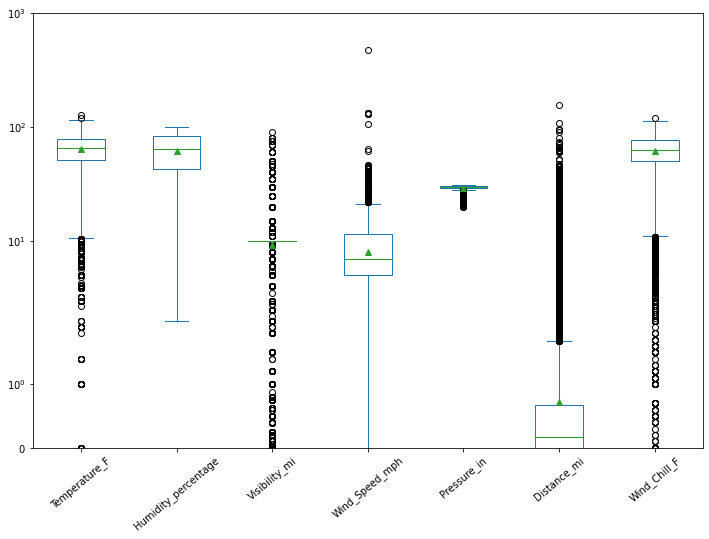

In [535]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

df[['Temperature_F','Humidity_percentage','Visibility_mi','Wind_Speed_mph','Pressure_in','Distance_mi','Wind_Chill_F']].plot.box(ax=ax, rot=40, showmeans=True)
ax.set_ylim(0, 1000)
ax.set_yscale('symlog')

**Drop outliers with IQR method**

In [536]:
# IQR method
#DEFINE A FUNCTION WHICH RETURNS A LIST OF INDEX OF OUTLIERS
def outliers(d_f , ft):
    Q1 = d_f[ft].quantile(0.25)
    Q3 = d_f[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_indexes = d_f.index[ (d_f[ft] < lower_bound) | (d_f[ft] > upper_bound) ]

    return outliers_indexes

In [537]:
# Find the indexes of outliers
#CREATE AN EMPTY LIST TO STORE THE OUTPUT INDICES FROM MULTIPLE COLUMNS
index_list = []
for feature in ['Temperature_F','Humidity_percentage','Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in','Distance_mi'  ]:
    index_list.extend( outliers(df, feature) )

len(index_list)

43617

In [538]:
#DEFINE A FUNCTION WHICH RETURNS A CLEANED DF WITHOUT OUTLIERS
def remove( d_f , outliers_indexes ):
    outliers_indexes = sorted(set(outliers_indexes))
    d_f = d_f.drop(outliers_indexes)
    return d_f

In [539]:
# Drop outliers
df_without_outliers = remove(df, index_list)
df_without_outliers.shape

(60993, 18)

,Severity,Start_Lat,Start_Lng,Distance_mi,Temperature_F,Pressure_in,Wind_Chill_F,Humidity_percentage,Visibility_mi,Wind_Speed_mph,Precipitation_in,Duration
count,60993.00000,60993.000000,60993.000000,60993.000000,60993.000000,60993.000000,60993.000000,60993.000000,60993.0,60993.000000,60993.0,60993.000000
mean,2.43141,36.508041,-94.777856,0.295283,65.948456,29.712077,63.271498,58.136048,10.0,7.867001,0.0,331.022773
std,1.09950,5.220279,17.667615,0.393403,17.479982,0.486164,18.793544,22.152561,0.0,4.628219,0.0,8577.848917
min,1.00000,24.571240,-124.422050,0.000000,10.800000,28.150000,-35.600000,3.000000,10.0,0.000000,0.0,6.000000
25%,1.00000,33.465980,-114.534026,0.000000,54.000000,29.460000,52.000000,42.000000,10.0,5.000000,0.0,30.000000
50%,2.00000,37.083289,-87.694575,0.109000,68.000000,29.880000,65.000000,60.000000,10.0,7.000000,0.0,65.000000
75%,3.00000,40.448353,-80.246840,0.478000,79.000000,30.040000,77.000000,75.000000,10.0,10.400000,0.0,320.000000
max,4.00000,48.964400,-67.606875,1.682000,115.000000,30.840000,112.000000,100.000000,10.0,21.000000,0.0,782610.000000


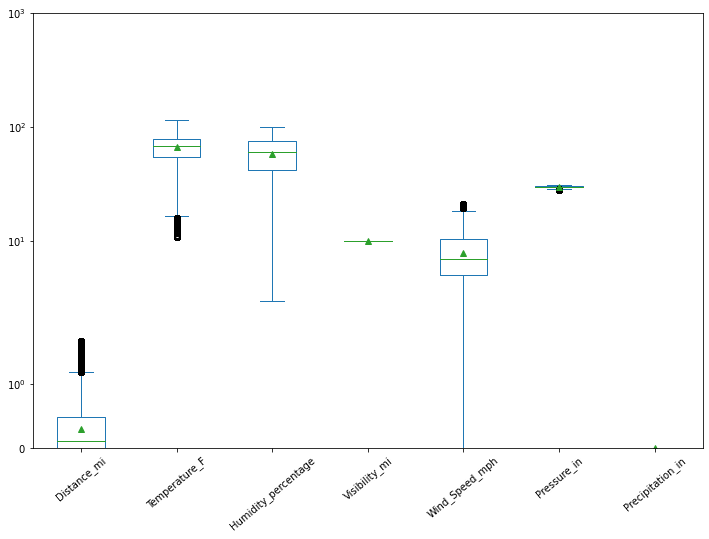

In [540]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
df_without_outliers[['Distance_mi','Temperature_F','Humidity_percentage', 'Visibility_mi', 'Wind_Speed_mph','Pressure_in', 'Precipitation_in']].plot.box(ax=ax, rot=40, showmeans=True)
ax.set_ylim(0, 1000)
ax.set_yscale('symlog')

df_without_outliers.describe()

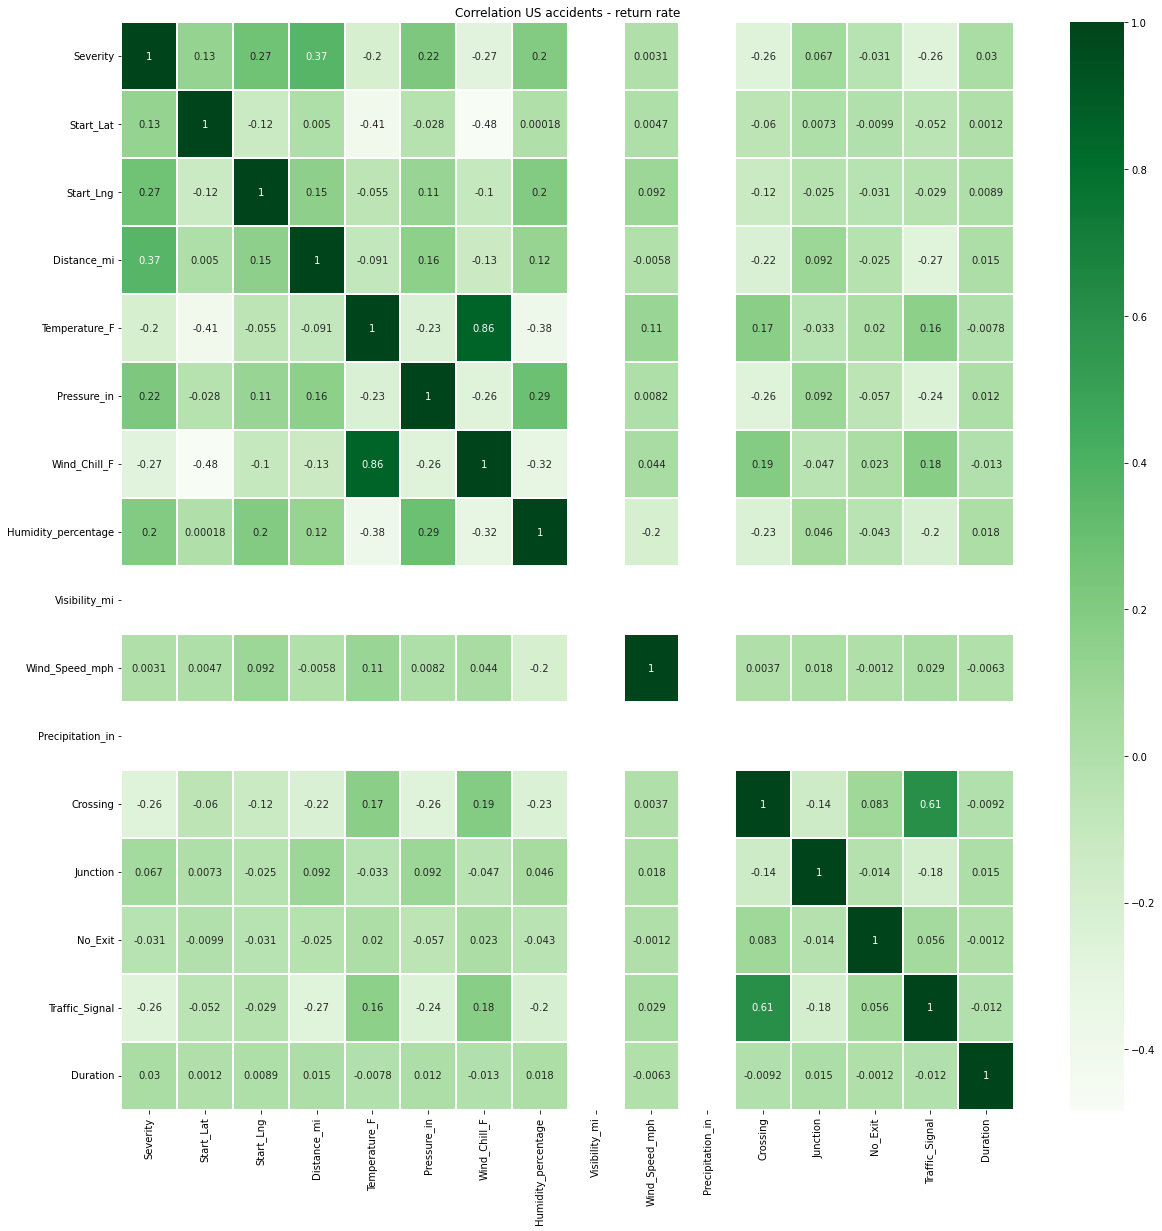

In [541]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_without_outliers.corr(), annot=True, cmap="Greens", linewidths=0.1, annot_kws={"fontsize":10})
plt.title("Correlation US accidents - return rate");

**Preprocessing**

In [542]:
scaler = MinMaxScaler()

X = scaler.fit_transform( df_without_outliers[['Start_Lat','Start_Lng',
       'Temperature_F', 'Wind_Chill_F', 'Humidity_percentage', 'Pressure_in',
       'Wind_Speed_mph']] )

In [543]:
X.shape

(60993, 7)

**We need to simplify the data by reducing its dimensions. Having 7 dimensions would make it challenging to group the data effectively. We can achieve this by using a method called Principal Component Analysis (PCA). By applying PCA and reducing the data to 4 dimensions, we can retain around 85% of the variability present in the original data. This means we can compress the data while still keeping most of the important information.**

**Utilize Principal Component Analysis (PCA) to reduce the dimensions of the data.**

In [544]:
pca = decomposition.PCA(n_components=4)
principalDF=pca.fit_transform(X)
data_pca = pd.DataFrame(data=principalDF, columns=['d1','d2','d3','d4'])

In [545]:
pca.explained_variance_ratio_.round(5).astype(str)

array(['0.32632', '0.23573', '0.1679', '0.12558'], dtype='<U32')

In [546]:
sum(pca.explained_variance_ratio_.round(5))

0.8555299999999999

**Clustering**

**K-Means**

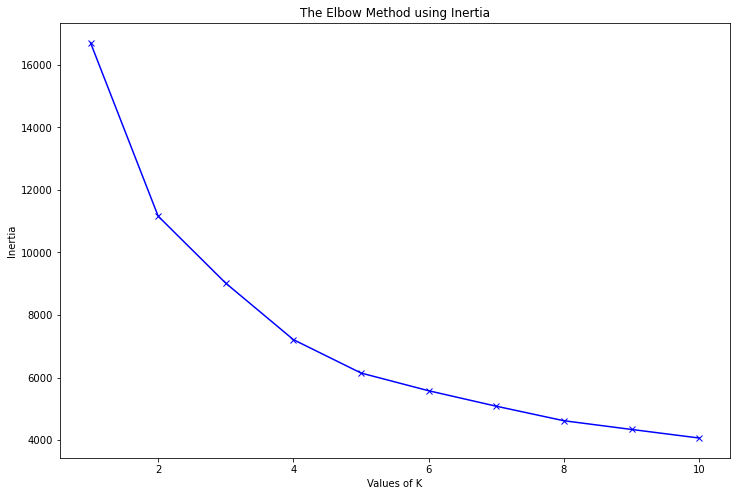

In [547]:
# ELBOW CRITERION
inertias = []
K = range(1, 11)
  
for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data_pca)
    kmeanModel.fit(data_pca)
    inertias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(12,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

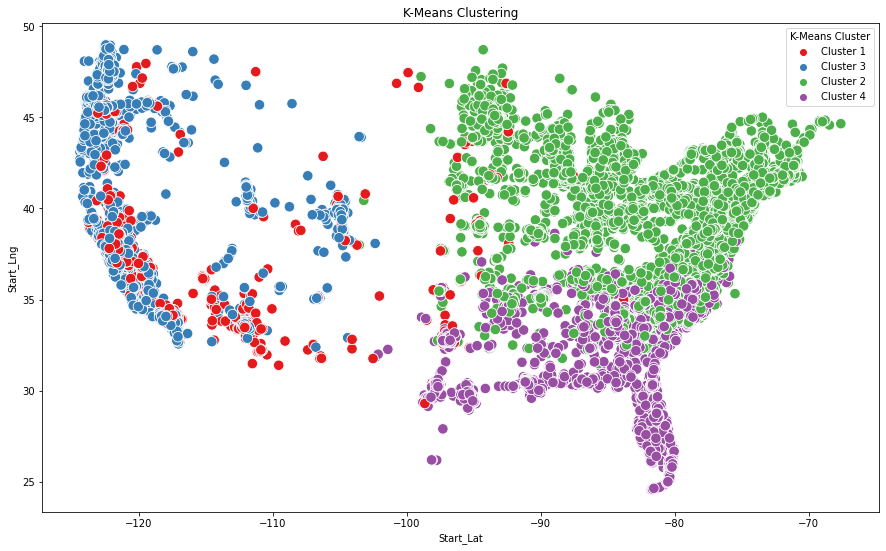

In [548]:
kmeans=KMeans(init="k-means++",n_clusters=4,random_state=15)
nsp_pred=kmeans.fit_predict(data_pca)

df_without_outliers['K-Means Cluster'] = nsp_pred
df_without_outliers['K-Means Cluster'].replace({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}, inplace=True)

plt.figure(figsize=(15,9))
sns.scatterplot(data=df_without_outliers, x='Start_Lng', y='Start_Lat', hue='K-Means Cluster', palette='Set1', s=110)
plt.title('K-Means Clustering')
plt.xlabel("Start_Lat")
plt.ylabel('Start_Lng')
plt.show()

In [549]:
df_without_outliers['K-Means Cluster'].value_counts()

Cluster 2    24142
Cluster 4    16112
Cluster 3    12557
Cluster 1     8182
Name: K-Means Cluster, dtype: int64

In [550]:
df_without_outliers.groupby('K-Means Cluster')[['Pressure_in', 'Wind_Chill_F', 'Temperature_F', 'Humidity_percentage', 'Wind_Speed_mph']].mean().round(2)

,Pressure_in,Wind_Chill_F,Temperature_F,Humidity_percentage,Wind_Speed_mph
K-Means Cluster,,,,,
Cluster 1,29.16,80.65,82.65,24.24,8.34
Cluster 2,29.70,52.09,57.20,61.00,8.14
Cluster 3,29.89,57.79,58.30,65.63,6.48
Cluster 4,29.87,75.47,76.54,65.21,8.30


In [551]:
df_without_outliers.groupby('K-Means Cluster')[['Pressure_in', 'Wind_Chill_F', 'Temperature_F', 'Humidity_percentage', 'Wind_Speed_mph']].median()

,Pressure_in,Wind_Chill_F,Temperature_F,Humidity_percentage,Wind_Speed_mph
K-Means Cluster,,,,,
Cluster 1,29.03,81.25,82.95,23.0,8.0
Cluster 2,29.79,54.00,58.00,61.0,8.0
Cluster 3,29.95,59.00,59.00,66.0,6.0
Cluster 4,29.97,77.00,78.10,65.0,8.0


**We noticed that the data is split into two parts: Western and Eastern. In each part, there are two clusters that have different weather characteristics, mainly in terms of temperature.**

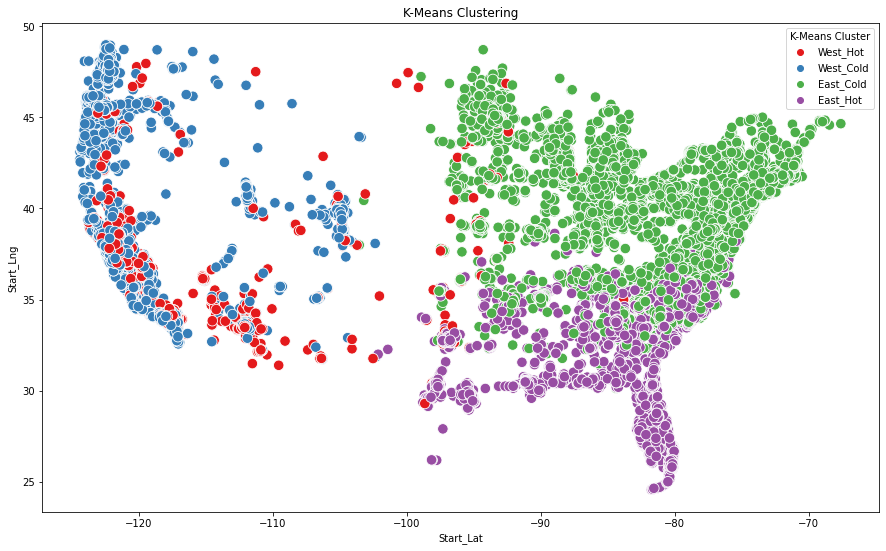

In [552]:
df_without_outliers['K-Means Cluster'].replace({'Cluster 1':'West_Hot', 'Cluster 2':'East_Cold', 'Cluster 3':'West_Cold', 'Cluster 4':'East_Hot'}, inplace=True)

plt.figure(figsize=(15,9))
sns.scatterplot(data=df_without_outliers, x='Start_Lng', y='Start_Lat', hue='K-Means Cluster', palette='Set1', s=110)
plt.title('K-Means Clustering')
plt.xlabel("Start_Lat")
plt.ylabel('Start_Lng')
plt.show()

In [553]:
df_without_outliers.groupby('K-Means Cluster')[['Duration', 'Distance_mi']].mean()

,Duration,Distance_mi
K-Means Cluster,,
East_Cold,415.380540,0.352539
East_Hot,420.032150,0.320869
West_Cold,195.762603,0.233069
West_Hot,114.422635,0.171439


In [554]:
df_without_outliers.groupby('K-Means Cluster')[['Duration', 'Distance_mi']].median()

,Duration,Distance_mi
K-Means Cluster,,
East_Cold,80.0,0.201
East_Hot,76.0,0.149
West_Cold,35.0,0.026
West_Hot,45.0,0.000


**From the tables above, we can see that accidents in Western America generally have shorter durations, and the road closures resulting from these accidents are also shorter.**

**DBSCAN**

In [555]:
X = scaler.fit_transform( df[['Start_Lat','Start_Lng',
       'Temperature_F', 'Wind_Chill_F', 'Humidity_percentage', 'Pressure_in',
       'Wind_Speed_mph']] )

In [556]:
pca = decomposition.PCA(n_components=3)
principalDF=pca.fit_transform(X)
data_pca = pd.DataFrame(data=principalDF, columns=['d1','d2','d3'])

In [557]:
pca.explained_variance_ratio_.round(5).astype(str)

array(['0.4325', '0.28271', '0.18116'], dtype='<U32')

In [558]:
sum(pca.explained_variance_ratio_.round(5))

0.89637

0.07292381865624335

<Figure size 360x360 with 0 Axes>

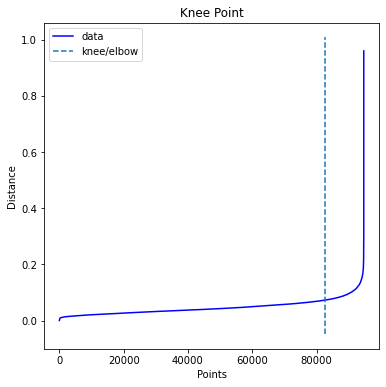

In [559]:
# Finding the Optimal value of EPS
# Sources: 
# [1] https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan
# [2] https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

distances[knee.knee]

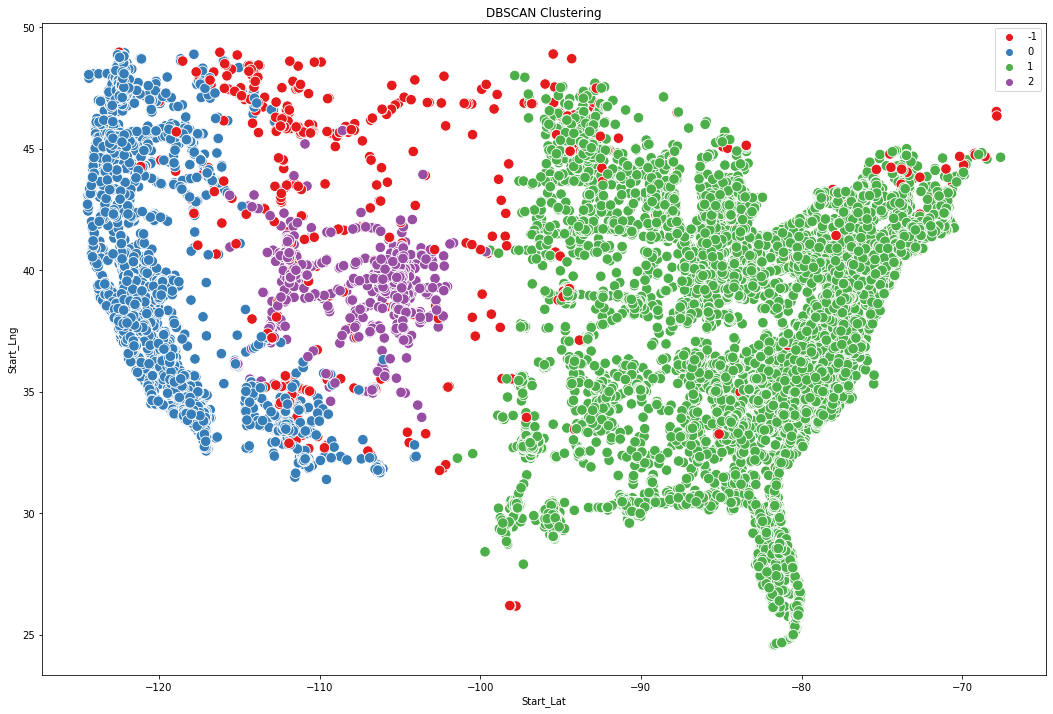

In [560]:
dbscan = DBSCAN(eps=distances[knee.knee],min_samples=100, n_jobs=-1)
dbscan.fit(data_pca)

plt.figure(figsize=(18, 12))
sns.scatterplot(data=df, x='Start_Lng', y='Start_Lat', hue=dbscan.labels_, palette='Set1',s=110)
plt.title('DBSCAN Clustering')
plt.xlabel("Start_Lat")
plt.ylabel('Start_Lng')
plt.show()

In [561]:
df['Cluster DBSCAN'] = dbscan.labels_
df['Cluster DBSCAN'].value_counts()

 1    59988
 0    29875
 2     3768
-1     1061
Name: Cluster DBSCAN, dtype: int64